# WeatherPy




In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
# Test carried out with small no of random city
#cities=cities[:20]
#print(f'{cities}')

In [17]:
print(f'{len(cities)}')

600


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# set up lists to hold reponse info
cloud=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
# Hold the name of not found city 
cityna=[]
# Begin the log of data retrival
print(f"Beginning Data Retrieval\n---------------")
# Loop through the list of cities and perform a request for data on each  
j=1
i=0
start_response=time.time()

for city in cities:
    
    try:
        # Build query URL
        url=f'{base_url}&appid={api_key}&q={city}&units={units}'
        # Get weather data
        wx_data=requests.get(url).json() 
        # Print the log data
        print(f'Processing Record {i} of Set {j} | {wx_data["name"]}')
        # Add or store data to place holder
        cloud.append(wx_data["clouds"]["all"])
        country.append(wx_data["sys"]["country"])
        date.append(wx_data["dt"])
        humidity.append(wx_data["main"]["humidity"])
        lat.append(wx_data["coord"]["lat"])
        lng.append(wx_data["coord"]["lon"])
        max_temp.append(wx_data["main"]["temp_max"])
        wind_speed.append(wx_data["wind"]["speed"])
    
    except KeyError:
        # Add name of not found city
        cityna.append(city)
        # Print the log data
        print("City not found, Skipping...")
        #del cities[n]
    # Number increament of Data set
    i+=1
    if i < 58:
        j=j
    else:
        j+=1
        i=0
        # Measure the time to sleep for one minute
        time_to_60s=60-(time.time()-start_response)
        if time_to_60s > 0:
            time.sleep(time_to_60s)
        start_response=time.time()
              

Beginning Data Retrieval
---------------
Processing Record 0 of Set 1 | Hobart
Processing Record 1 of Set 1 | Avarua
Processing Record 2 of Set 1 | Castro
Processing Record 3 of Set 1 | Quatre Cocos
Processing Record 4 of Set 1 | Thompson
Processing Record 5 of Set 1 | Vera Cruz
Processing Record 6 of Set 1 | Cidreira
Processing Record 7 of Set 1 | Pevek
Processing Record 8 of Set 1 | Rikitea
Processing Record 9 of Set 1 | Hermanus
Processing Record 10 of Set 1 | Jamestown
Processing Record 11 of Set 1 | Bluff
Processing Record 12 of Set 1 | San Diego de la Union
Processing Record 13 of Set 1 | Hofn
Processing Record 14 of Set 1 | Busselton
Processing Record 15 of Set 1 | Hithadhoo
Processing Record 16 of Set 1 | Emerald
City not found, Skipping...
Processing Record 18 of Set 1 | Katsuura
Processing Record 19 of Set 1 | Balkanabat
Processing Record 20 of Set 1 | Bethel
City not found, Skipping...
Processing Record 22 of Set 1 | Upernavik
City not found, Skipping...
Processing Record 24

Processing Record 31 of Set 4 | Saint-Georges
Processing Record 32 of Set 4 | Waycross
City not found, Skipping...
Processing Record 34 of Set 4 | Dunedin
Processing Record 35 of Set 4 | San Quintin
Processing Record 36 of Set 4 | Puerto del Rosario
Processing Record 37 of Set 4 | Atherton
Processing Record 38 of Set 4 | Arman
Processing Record 39 of Set 4 | Vorotynets
Processing Record 40 of Set 4 | Broome
Processing Record 41 of Set 4 | Tarakan
Processing Record 42 of Set 4 | San Patricio
Processing Record 43 of Set 4 | Nortelandia
Processing Record 44 of Set 4 | Pierre
Processing Record 45 of Set 4 | Sayyan
Processing Record 46 of Set 4 | Bemidji
Processing Record 47 of Set 4 | Shakhtinsk
Processing Record 48 of Set 4 | Varna
Processing Record 49 of Set 4 | Zuidhorn
Processing Record 50 of Set 4 | Ginda
Processing Record 51 of Set 4 | Marion
Processing Record 52 of Set 4 | Alice Springs
Processing Record 53 of Set 4 | Ilulissat
Processing Record 54 of Set 4 | East London
City not fo

Processing Record 4 of Set 8 | Hami
Processing Record 5 of Set 8 | Lagoa
Processing Record 6 of Set 8 | Galesong
Processing Record 7 of Set 8 | Mareeba
Processing Record 8 of Set 8 | Ayan
City not found, Skipping...
Processing Record 10 of Set 8 | Fort Frances
Processing Record 11 of Set 8 | Ostrovnoy
Processing Record 12 of Set 8 | Polunochnoye
Processing Record 13 of Set 8 | Les Cayes
Processing Record 14 of Set 8 | Xiamen
Processing Record 15 of Set 8 | Aberdeen
Processing Record 16 of Set 8 | Margate
Processing Record 17 of Set 8 | Lillooet
Processing Record 18 of Set 8 | Ambon
Processing Record 19 of Set 8 | Te Anau
Processing Record 20 of Set 8 | Rioja
Processing Record 21 of Set 8 | Sambava
City not found, Skipping...
City not found, Skipping...
Processing Record 24 of Set 8 | Teknaf
Processing Record 25 of Set 8 | Gold Coast
Processing Record 26 of Set 8 | Maragogi
Processing Record 27 of Set 8 | Moskovskiy
Processing Record 28 of Set 8 | Manggar
Processing Record 29 of Set 8 |

In [19]:
# Check arry length
print(f'City   {len(cities)}')
print(f'Cloudiness   {len(cloud)}')
print(f'Country {len(country)}')
print(f'Date   {len(date)}')
print(f'Humidity   {len(humidity)}')
print(f'Lat   {len(lat)}')
print(f'Lng   {len(lng)}')
print(f'max_temp   {len(max_temp)}')
print(f'wind_speed   {len(wind_speed)}')

City   600
Cloudiness   534
Country 534
Date   534
Humidity   534
Lat   534
Lng   534
max_temp   534
wind_speed   534


In [20]:
# Remove City name not having response data
for delcity in cityna:
    i=0    
    for city in cities:
        if city == delcity:
            del cities[i]
            i+=1
        else:
            i+=1
# Check arry length  
print(f'City   {len(cities)}')
print(f'Cloudiness   {len(cloud)}')
print(f'Country {len(country)}')
print(f'Date   {len(date)}')
print(f'Humidity   {len(humidity)}')
print(f'Lat   {len(lat)}')
print(f'Lng   {len(lng)}')
print(f'max_temp   {len(max_temp)}')
print(f'wind_speed   {len(wind_speed)}')

City   534
Cloudiness   534
Country 534
Date   534
Humidity   534
Lat   534
Lng   534
max_temp   534
wind_speed   534


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# create a data frame from cities, Cloudiness, Country, Date, Humidity, latitude, Longitude, Max Temp and Win Speed.
weather_dict = {
    "City": cities,
    "Cloudiness":cloud,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_data = pd.DataFrame(weather_dict)
# Delete any unwanted null value
weather_data=weather_data.dropna(how="any")
# Save all data in a csv file
weather_data.to_csv(output_data_file, index=None, header=True)
# Show data head
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,lat,Lng,Max Temp,Wind Speed
0,hobart,75,AU,1553452155,52,-42.88,147.33,64.4,27.51
1,avarua,88,CK,1553448600,88,-21.21,-159.78,78.8,4.70
2,castro,40,CL,1553450400,62,-42.48,-73.76,59.0,13.87
3,quatre cocos,75,MU,1553451839,94,-20.21,57.76,77.0,3.36
4,thompson,5,CA,1553450400,37,55.74,-97.86,17.6,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

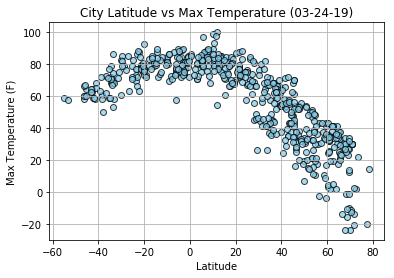

In [22]:
# Latitude vs. Temperature Plot
lat=weather_data[["lat"]]
temp=weather_data[["Max Temp"]]
plt.scatter(lat, temp, marker="o", facecolors="skyblue", alpha=0.75, edgecolors="black",label="Temp")
#plt.axis([x_min,x_max,y_min,y_max])

today1=datetime.datetime.today().strftime('%m-%d-%y')
plt.grid(True)
plt.title(f"City Latitude vs Max Temperature ({today1})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Save the figure
plt.savefig("image\MaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

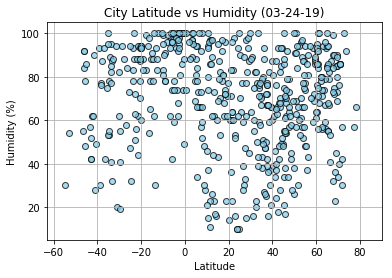

In [23]:
# Latitude VS Humidity
lat=weather_data[["lat"]]
hum=weather_data[["Humidity"]]
plt.scatter(lat, hum, marker="o", facecolors="skyblue", alpha=0.75, edgecolors="black")
plt.axis([-63,90,5,105])

today1=datetime.datetime.today().strftime('%m-%d-%y')
plt.grid(True)
plt.title(f"City Latitude vs Humidity ({today1})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("image\Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

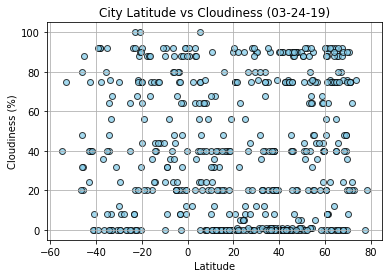

In [24]:
# Latitude VS Cloudiness

lat=weather_data[["lat"]]
cloud=weather_data[["Cloudiness"]]
plt.scatter(lat, cloud, marker="o", facecolors="skyblue", alpha=0.75, edgecolors="black")
#plt.axis([-63,90,5,105])

today1=datetime.datetime.today().strftime('%m-%d-%y')
plt.grid(True)
plt.title(f"City Latitude vs Cloudiness ({today1})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("image\Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

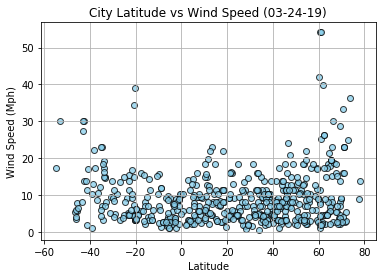

In [25]:
# Latitude VS Max Wind speed

lat=weather_data[["lat"]]
wind=weather_data[["Wind Speed"]]
plt.scatter(lat, wind, marker="o", facecolors="skyblue", alpha=0.75, edgecolors="black")
#plt.axis([-63,90,5,105])

today1=datetime.datetime.today().strftime('%m-%d-%y')
plt.grid(True)
plt.title(f"City Latitude vs Wind Speed ({today1})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Mph)")
# Save the figure
plt.savefig("image\Wind.png")

# Show plot
plt.show()

### Analysis
* The weather becomes significantly warmer as we approaches to the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This is due to the tilt of the earth.

* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 20, 75, and 90% cloudiness. Less cloud band of city observed at 42 to 65%.

* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind and a good source of renewable energy(Wind Electricity Generation).